# Лабораторная работа №2


1.   2-approx алгоритм
2.   Динамическое программирование
    *   На весах
3. Метод ветвей и границ используя только 1 предмет
4. PTAS или FPTAS





# Парсим данные

In [ ]:
from json import dump

In [ ]:
import requests

In [ ]:
base_url = 'https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/'

In [ ]:
html_page = requests.get(base_url + 'knapsack_01.html').content.decode('utf-8')

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_page)

In [ ]:
data = {}

In [ ]:
for ul in soup.find_all('ul'):
    for link in ul.find_all('a'):
        link = link['href']
        dataset_key = link.split('_')[0]
        key = link.split('_')[1][0]
        if not data.get(dataset_key):
            data[dataset_key] = {}
        data[dataset_key][key] = [int(item) for item in requests.get(base_url + link).content.decode('utf-8').split('\n') if item]
    

In [ ]:
del data['p08']

In [ ]:
data

{'p01': {'c': [165],
  'p': [92, 57, 49, 68, 60, 43, 67, 84, 87, 72],
  's': [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
  'w': [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]},
 'p02': {'c': [26],
  'p': [24, 13, 23, 15, 16],
  's': [0, 1, 1, 1, 0],
  'w': [12, 7, 11, 8, 9]},
 'p03': {'c': [190],
  'p': [50, 50, 64, 46, 50, 5],
  's': [1, 1, 0, 0, 1, 0],
  'w': [56, 59, 80, 64, 75, 17]},
 'p04': {'c': [50],
  'p': [70, 20, 39, 37, 7, 5, 10],
  's': [1, 0, 0, 1, 0, 0, 0],
  'w': [31, 10, 20, 19, 4, 3, 6]},
 'p05': {'c': [104],
  'p': [350, 400, 450, 20, 70, 8, 5, 5],
  's': [1, 0, 1, 1, 1, 0, 1, 1],
  'w': [25, 35, 45, 5, 25, 3, 2, 2]},
 'p06': {'c': [170],
  'p': [442, 525, 511, 593, 546, 564, 617],
  's': [0, 1, 0, 1, 0, 0, 1],
  'w': [41, 50, 49, 59, 55, 57, 60]},
 'p07': {'c': [750],
  'p': [135,
   139,
   149,
   150,
   156,
   163,
   173,
   184,
   192,
   201,
   210,
   214,
   221,
   229,
   240],
  's': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1],
  'w': [70, 73, 77, 80, 82, 87, 90, 94, 

# Динамическое программирование

# На весах

In [ ]:
def DP_weight(weights, costs, knap_weight, counter=None, show_cost_table=False):
  cost_table = [[0 for i in range(knap_weight + 1)] for _ in range(len(weights) + 1)]

  for i in range(1, len(weights)+ 1):
    for w in range(knap_weight + 1):
      if counter:
        counter[0] += 1
      if i == 0 or w == 0:
        cost_table[i][w] = 0
      elif weights[i-1] <= w:
        cost_table[i][w] = max(cost_table[i-1][w], costs[i-1] + cost_table[i-1][w - weights[i-1]])
      elif weights[i-1] > w:
        cost_table[i][w] = cost_table[i-1][w]

  if show_cost_table:
    print(cost_table)
  return cost_table[len(weights)][knap_weight]

Тесты

In [ ]:
for test_name in data.keys():
  print(f'Test name: {test_name}')
  weights = data[test_name]['w']
  costs = data[test_name]['p']
  knap_weight = data[test_name]['c'][0]
  right_cost = sum([data[test_name]['p'][i] for i in range(len(data[test_name]['s'])) if data[test_name]['s'][i]])
  assert DP_weight(weights, costs, knap_weight) == right_cost
  print('Test passed!')

Test name: p01
Test passed!
Test name: p02
Test passed!
Test name: p03
Test passed!
Test name: p04
Test passed!
Test name: p05
Test passed!
Test name: p06
Test passed!
Test name: p07
Test passed!


# 2-approx алгоритм

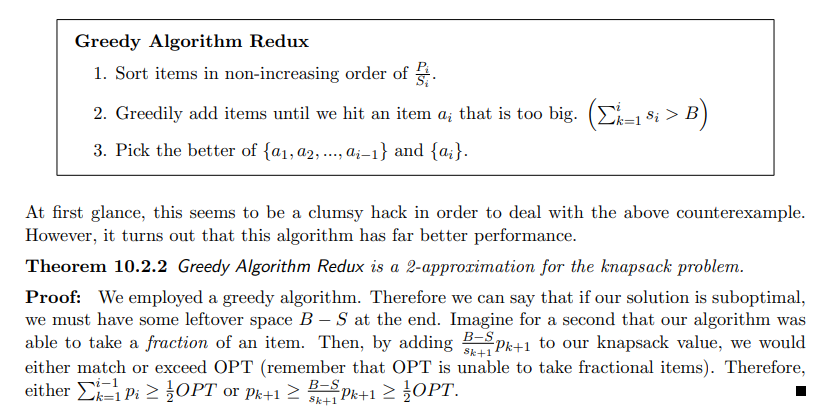

In [ ]:
def get_cost_sum_bi(object_list, costs, counter=None):
  sum_costs = 0

  for i in range(len(object_list)):
    if object_list[i] > 0:
      sum_costs += costs[i]

  return sum_costs

In [ ]:
def greedy(weights, costs, knap_weight, counter=None):
  quality = [i / j for i, j in zip(costs, weights)]

  sorted_ind = sorted(range(len(quality)), key=lambda k: quality[k], reverse = True)

  sum_weights = 0
  object_list = [0 for i in range(len(weights))]

  for el in sorted_ind:
    if sum_weights + weights[el] <= knap_weight:
      sum_weights += weights[el]
      object_list[el] = 1
    else:
      if counter:
          counter[0] += 2
      if sum_weights >= weights[el]:
        return object_list, get_cost_sum_bi(object_list, costs)
        
      elif weights[el] <= knap_weight:
        object_list = [0 for i in range(len(weights))]
        object_list[el] = 1
        return object_list, costs[el]

Тесты:

In [ ]:
for test_name in data.keys():
  print(f'Test name: {test_name}')
  weights = data[test_name]['w']
  costs = data[test_name]['p']
  knap_weight = data[test_name]['c'][0]
  object_list = greedy(weights, costs, knap_weight)[0]
  right_cost = [costs[] for i in range(len(data[test_name]['s'])) if data[test_name]['s'][i])
  print('Test passed!')

Test name: p01
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
Test passed!
Test name: p02
[1, 0, 1, 0, 0] [0, 1, 1, 1, 0]
Test passed!
Test name: p03
[1, 1, 0, 0, 0, 0] [1, 1, 0, 0, 1, 0]
Test passed!
Test name: p04
[1, 1, 0, 0, 0, 0, 0] [1, 0, 0, 1, 0, 0, 0]
Test passed!
Test name: p05
[1, 1, 0, 0, 0, 0, 0, 0] [1, 0, 1, 1, 1, 0, 1, 1]
Test passed!
Test name: p06
[1, 1, 1, 0, 0, 0, 0] [0, 1, 0, 1, 0, 0, 1]
Test passed!
Test name: p07
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
Test passed!


# PTAS

Функция построения комбинаций, чтобы создать множества мощности меньше k:

In [ ]:
def combinations(iterable, r, counter=None):
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield list(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield list(pool[i] for i in indices)

Очень плохо и очень запарно создаем наборы размера k:

In [ ]:
def create_k_set(k, n_objects, counter=None):
  object_sets = [[]]
  object_ind = [i for i in range(0, n_objects)]

  for i in range(1,k+1):
    for el in list(combinations(object_ind, i)):
      object_sets.append(el)

  return object_sets

Считаем общий вес и общую стоимость конекретных поднаборов:

In [ ]:
def get_weight_sum(object_list, weights, counter=None):
  sum_weights = 0

  for el in object_list:
    sum_weights += weights[el]

  return sum_weights

In [ ]:
def get_cost_sum(object_list, costs, counter=None):
  sum_costs = 0

  for el in object_list:
    sum_costs += costs[el]

  return sum_costs

Делаем бинарное представление обьектов, входящих в итоговый рюкзак:

In [ ]:
def get_binary(M, n_objects, counter=None):
  arr = [0 for _ in range(n_objects)]

  for el in M:
    arr[el] = 1

  return arr

Та самая GS:

In [ ]:
def greed_search(n_objects, knap_weight, costs, weights, object_list, counter=None):
  z_g = 0
  X = []
  sum_weights = get_weight_sum(object_list, weights, counter)

  weight_rest = knap_weight - sum_weights

  for j in range(0, n_objects):
    if j not in object_list and weights[j] <= weight_rest:
      z_g += costs[j]
      weight_rest -= weights[j]
      X.append(j)
  
  if counter:
    counter[0] += 1
  
  return z_g, X

Основная часть алгоритма:

In [ ]:
def PTAS(weights, costs, knap_weight, k, counter=None):
  n = len(weights)
  z_h = 0

  object_sets = create_k_set(k, n, counter)

  for M in object_sets:
    # if counter:
    #   counter[0] += 1 
    # этот counter зависит от того, считаем ли мы наборы M - промежуточными решениями, скорее всего нет
    sum_weights = get_weight_sum(M, weights, counter)

    if sum_weights > knap_weight:
      continue

    z_g, X = greed_search(n, knap_weight, costs, weights, M, counter)
    sum_costs = get_cost_sum(M, costs, counter)

    if z_g + sum_costs > z_h:
      if counter:
        counter[0] += 1 
      z_h = z_g + sum_costs
      X_h = M + X

  X_h = get_binary(X_h, n, counter)

  return z_h, X_h

Тесты:

In [ ]:
for test_name in data.keys():
  print(f'Test name: {test_name}')
  weights = data[test_name]['w']
  costs = data[test_name]['p']
  knap_weight = data[test_name]['c'][0]
  assert PTAS(weights, costs, knap_weight, 7)[1] == data[test_name]['s']
  print(PTAS(weights, costs, knap_weight, 7)[1], data[test_name]['s'])
  print('Test passed!')

Test name: p01
[1, 1, 1, 1, 0, 1, 0, 0, 0, 0] [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
Test passed!
Test name: p02
[0, 1, 1, 1, 0] [0, 1, 1, 1, 0]
Test passed!
Test name: p03
[1, 1, 0, 0, 1, 0] [1, 1, 0, 0, 1, 0]
Test passed!
Test name: p04
[1, 0, 0, 1, 0, 0, 0] [1, 0, 0, 1, 0, 0, 0]
Test passed!
Test name: p05
[1, 0, 1, 1, 1, 0, 1, 1] [1, 0, 1, 1, 1, 0, 1, 1]
Test passed!
Test name: p06
[0, 1, 0, 1, 0, 0, 1] [0, 1, 0, 1, 0, 0, 1]
Test passed!
Test name: p07
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
Test passed!


# Метод ветвей и границ

In [ ]:
weights  = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
costs = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
knap_weight = 750
current_weight = 0
current_cost = 0
next_index = -1
objects = [0 for i in range(len(weights))]

In [ ]:
def branch_bound_method(weights, costs, knap_weight, current_weight, current_cost, next_index, objects, counter=None):
  if next_index < len(weights) - 1:
    next_index += 1
    objects[next_index] = 0
    without_obj, with_obj = {}, {}
  
    without_obj = branch_bound_method(weights, costs, knap_weight, current_weight, current_cost, next_index, objects.copy(), counter)
    if counter:
      counter[0] += 1

    if weights[next_index] + current_weight <= knap_weight:
      current_weight += weights[next_index]
      current_cost += costs[next_index]
      objects[next_index] = 1
      with_obj = branch_bound_method(weights, costs, knap_weight, current_weight, current_cost, next_index, objects.copy(), counter)
      if counter:
        counter[0] += 1
    
      if without_obj['current_cost'] > with_obj['current_cost']:
        return without_obj
      else:
        return with_obj
    else:
      return without_obj

  else:
    return {
        'current_cost': current_cost,
        'objects': objects.copy(),
    }

Тесты

In [ ]:
for test_name in data.keys():
  print(f'Test name: {test_name}')
  weights = data[test_name]['w']
  costs = data[test_name]['p']
  knap_weight = data[test_name]['c'][0]
  current_weight = 0
  current_cost = 0
  next_index = -1
  objects = [0 for i in range(len(weights))]
  assert branch_bound_method(weights, costs, knap_weight, current_weight, current_cost, next_index, objects)['objects'] == data[test_name]['s']
  print('Test passed!')

Test name: p01
Test passed!
Test name: p02
Test passed!
Test name: p03
Test passed!
Test name: p04
Test passed!
Test name: p05
Test passed!
Test name: p06
Test passed!
Test name: p07
Test passed!


In [ ]:
from time import time

In [ ]:
additionals_args = {
    'DP': lambda _: [],
    '2-approx': lambda _: [],
    'PTAS': lambda _: [7],
    'Branch boundaries': lambda weights: [0, 0, -1, [0 for i in range(len(weights))]]
}

In [ ]:
def get_time_test(func, name):
  current_time_tests = {}
  for test_name in data.keys():
    avg_time = 0
    for _ in range(100):
      start_time = time()
      args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args[name](data[test_name]['w'])
      func(*args)
      avg_time += time() - start_time
    current_time_tests[test_name] = avg_time / 100
  return current_time_tests

## Время на каждый тест:

In [ ]:
import pandas as pd

In [ ]:
functions = {
    'DP': DP_weight, # weights, costs, knap_weight
    'PTAS': PTAS, # weights, costs, knap_weight, k
    '2-approx': greedy, # weights, costs, knap_weight
    'Branch boundaries': branch_bound_method # weights, costs, knap_weight, current_weight, current_cost, next_index, objects
}

In [ ]:
results = {}
for name, func in functions.items():
  results[name] = get_time_test(func, name)
pd.DataFrame.from_dict(results, orient='index', columns=data.keys())

,p01,p02,p03,p04,p05,p06,p07
DP,0.000992,0.000080,0.000638,0.000210,0.000535,0.000685,0.007327
PTAS,0.002898,0.000123,0.000222,0.000577,0.001220,0.000422,0.125960
2-approx,0.000007,0.000005,0.000005,0.000006,0.000007,0.000006,0.000010
Branch boundaries,0.000340,0.000028,0.000050,0.000114,0.000295,0.000097,0.031038


## Лучшие итоговые стоимости

In [ ]:
costs = {key: {} for key in data.keys()}
for test_name in data.keys():
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['DP'](data[test_name]['w'])
    cost = DP_weight(*args)
    costs[test_name]['DP'] = cost
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['PTAS'](data[test_name]['w'])
    cost, _ = PTAS(*args)
    costs[test_name]['PTAS'] = cost
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['2-approx'](data[test_name]['w'])
    _, cost = greedy(*args)
    costs[test_name]['2-approx'] = cost
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['Branch boundaries'](data[test_name]['w'])
    result = branch_bound_method(*args)
    cost = result['current_cost']
    costs[test_name]['Branch boundaries'] = cost
pd.DataFrame.from_dict(costs)

,p01,p02,p03,p04,p05,p06,p07
DP,309,51,150,107,900,1735,1458
PTAS,309,51,150,107,900,1735,1458
2-approx,266,47,100,90,750,1478,1302
Branch boundaries,309,51,150,107,900,1735,1458


## Лучший итоговый вес

In [ ]:
def count_total_weight(objects, weights):
  return sum([weights[i] for i in range(len(objects)) if objects[i] == 1])

In [ ]:
weights = {key: {} for key in data.keys()}
for test_name in data.keys():
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['PTAS'](data[test_name]['w'])
    _, objects = PTAS(*args)
    weights[test_name]['DP'] = count_total_weight(objects, data[test_name]['w'])
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['PTAS'](data[test_name]['w'])
    _, objects = PTAS(*args)
    weights[test_name]['PTAS'] = count_total_weight(objects, data[test_name]['w'])
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['2-approx'](data[test_name]['w'])
    objects, _ = greedy(*args)
    weights[test_name]['2-approx'] = count_total_weight(objects, data[test_name]['w'])
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['Branch boundaries'](data[test_name]['w'])
    result = branch_bound_method(*args)
    objects = result['objects']
    weights[test_name]['Branch boundaries'] = count_total_weight(objects, data[test_name]['w'])
pd.DataFrame.from_dict(weights)

,p01,p02,p03,p04,p05,p06,p07
DP,165,26,190,50,104,169,749
PTAS,165,26,190,50,104,169,749
2-approx,127,23,115,41,60,140,667
Branch boundaries,165,26,190,50,104,169,749


## Наборы объектов

In [ ]:
result = {
    func_name: {key: [] for key in data.keys()} for func_name in functions.keys()
}
for test_name in data.keys():
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['PTAS'](data[test_name]['w'])
    _, objects = PTAS(*args)
    result['DP'][test_name] = objects
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['PTAS'](data[test_name]['w'])
    _, objects = PTAS(*args)
    result['PTAS'][test_name] = objects
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['2-approx'](data[test_name]['w'])
    objects, _ = greedy(*args)
    result['2-approx'][test_name] = objects
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args['Branch boundaries'](data[test_name]['w'])
    result_func = branch_bound_method(*args)
    objects = result_func['objects']
    result['Branch boundaries'][test_name] = objects

for func_name, res in result.items():
  print(func_name)
  for test_name, objects in res.items():
    print(f'{test_name}: {objects}')
  print()

DP
p01: [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
p02: [0, 1, 1, 1, 0]
p03: [1, 1, 0, 0, 1, 0]
p04: [1, 0, 0, 1, 0, 0, 0]
p05: [1, 0, 1, 1, 1, 0, 1, 1]
p06: [0, 1, 0, 1, 0, 0, 1]
p07: [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

PTAS
p01: [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
p02: [0, 1, 1, 1, 0]
p03: [1, 1, 0, 0, 1, 0]
p04: [1, 0, 0, 1, 0, 0, 0]
p05: [1, 0, 1, 1, 1, 0, 1, 1]
p06: [0, 1, 0, 1, 0, 0, 1]
p07: [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

2-approx
p01: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
p02: [1, 0, 1, 0, 0]
p03: [1, 1, 0, 0, 0, 0]
p04: [1, 1, 0, 0, 0, 0, 0]
p05: [1, 1, 0, 0, 0, 0, 0, 0]
p06: [1, 1, 1, 0, 0, 0, 0]
p07: [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

Branch boundaries
p01: [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
p02: [0, 1, 1, 1, 0]
p03: [1, 1, 0, 0, 1, 0]
p04: [1, 0, 0, 1, 0, 0, 0]
p05: [1, 0, 1, 1, 1, 0, 1, 1]
p06: [0, 1, 0, 1, 0, 0, 1]
p07: [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]



## Количество операций

In [ ]:
results = {
    func_name: {key: [] for key in data.keys()} for func_name in functions.keys()
}
for name, func in functions.items():
  for test_name in data.keys():
    counter = [0]
    args = [data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0]] + additionals_args[name](data[test_name]['w']) + [counter]
    func(*args)
    results[name][test_name] = counter[0]

pd.DataFrame.from_dict(results)

,DP,PTAS,2-approx,Branch boundaries
p01,1660,143,2,569
p02,135,21,2,43
p03,1146,36,2,77
p04,357,73,2,152
p05,840,208,2,413
p06,1197,69,2,156
p07,11265,16383,2,44447


## Печатаем промежуточное состояние для DP_weight

In [ ]:
for test_name in data.keys():
  print(f'{test_name}')
  DP_weight(data[test_name]['w'], data[test_name]['p'], data[test_name]['c'][0], None, True)

p01
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9